**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/final-project).**

---


Now it's time for you to demonstrate your new skills with a project of your own!

In this exercise, you will work with a dataset of your choosing.  Once you've selected a dataset, you'll design and create your own plot to tell interesting stories behind the data!

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [2]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex7 import *
print("Setup Complete")

Setup Complete


## Step 1: Attach a dataset to the notebook

Begin by selecting a CSV dataset from [Kaggle Datasets](https://www.kaggle.com/datasets).  If you're unsure how to do this, please revisit the instructions in the previous tutorial.

Once you have selected a dataset, click on the **[+ Add data]** option in the top right corner.  This will generate a pop-up window that you can use to search for your chosen dataset.  

![ex6_search_dataset](https://i.imgur.com/cIIWPUS.png)

Once you have found the dataset, click on the **[Add]** button to attach it to the notebook.  You can check that it was successful by looking at the **Data** dropdown menu to the right of the notebook -- look for an **input** folder containing a subfolder that matches the name of the dataset.

<center>
<img src="https://i.imgur.com/nMYc1Nu.png" width=30%><br/>
</center>

You can click on the carat to the left of the name of the dataset to double-check that it contains a CSV file.  For instance, the image below shows that the example dataset contains two CSV files: (1) **dc-wikia-data.csv**, and (2) **marvel-wikia-data.csv**.

<center>
<img src="https://i.imgur.com/B4sJkVA.png" width=30%><br/>
</center>

Once you've uploaded a dataset with a CSV file, run the code cell below **without changes** to receive credit for your work!

In [3]:
# Check for a dataset with a CSV file
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



## Step 2: Specify the filepath

Now that the dataset is attached to the notebook, you can find its filepath.  To do this, begin by clicking on the CSV file you'd like to use.  This will open the CSV file in a tab below the notebook.  You can find the filepath towards the top of this new tab.  

![ex6_filepath](https://i.imgur.com/fgXQV47.png)

After you find the filepath corresponding to your dataset, fill it in as the value for `my_filepath` in the code cell below, and run the code cell to check that you've provided a valid filepath.  For instance, in the case of this example dataset, we would set
```
my_filepath = "../input/fivethirtyeight-comic-characters-dataset/dc-wikia-data.csv"
```  
Note that **you must enclose the filepath in quotation marks**; otherwise, the code will return an error.

Once you've entered the filepath, you can close the tab below the notebook by clicking on the **[X]** at the top of the tab.

In [4]:
# Fill in the line below: Specify the path of the CSV file to read
my_filepath = "../input/covid19-coronavirus-pandemic/COVID-19 Coronavirus.csv"

# Check for a valid filepath to a CSV file in a dataset
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



## Step 3: Load the data

Use the next code cell to load your data file into `my_data`.  Use the filepath that you specified in the previous step.

In [5]:
# Fill in the line below: Read the file into a variable my_data
my_data = pd.read_csv(my_filepath)

# Check that a dataset has been uploaded into my_data
step_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



**_After the code cell above is marked correct_**, run the code cell below without changes to view the first five rows of the data.

In [6]:
# Print the first five rows of the data
my_data.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [7]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [8]:
my_data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Latin America and the Caribbean',
       'Oceania', 'Northern America'], dtype=object)

In [9]:
type(my_data.groupby(['Continent']).sum())

pandas.core.frame.DataFrame

In [10]:
# groupby by ['Continent'], and then sum
group_continent = my_data.groupby(['Continent']).sum()[['Population', 'Total Cases', 'Total Deaths']]

In [11]:
group_continent

,Population,Total Cases,Total Deaths
Continent,,,
Africa,1396751613,11764207,252873
Asia,4668689344,140957179,1405003
Europe,748420351,180332483,1775727
Latin America and the Caribbean,661325824,67509231,1686828
Northern America,372846593,85364770,1046062
Oceania,43437948,5647957,9336


In [12]:
# add column 'Case percentage', 'Death percentage'
group_continent['Case percentage'] = pd.Series([(group_continent.iloc[x, 1]/group_continent.iloc[x, 0]) for x in range(len(group_continent.index))], index=group_continent.index)
group_continent['Death percentage'] = pd.Series([(group_continent.iloc[x, 2]/group_continent.iloc[x, 0]) for x in range(len(group_continent.index))], index=group_continent.index)

In [13]:
group_continent

,Population,Total Cases,Total Deaths,Case percentage,Death percentage
Continent,,,,,
Africa,1396751613,11764207,252873,0.008423,0.000181
Asia,4668689344,140957179,1405003,0.030192,0.000301
Europe,748420351,180332483,1775727,0.240951,0.002373
Latin America and the Caribbean,661325824,67509231,1686828,0.102082,0.002551
Northern America,372846593,85364770,1046062,0.228954,0.002806
Oceania,43437948,5647957,9336,0.130024,0.000215


## Step 4: Visualize the data

Use the next code cell to create a figure that tells a story behind your dataset.  You can use any chart type (_line chart, bar chart, heatmap, etc_) of your choosing!

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



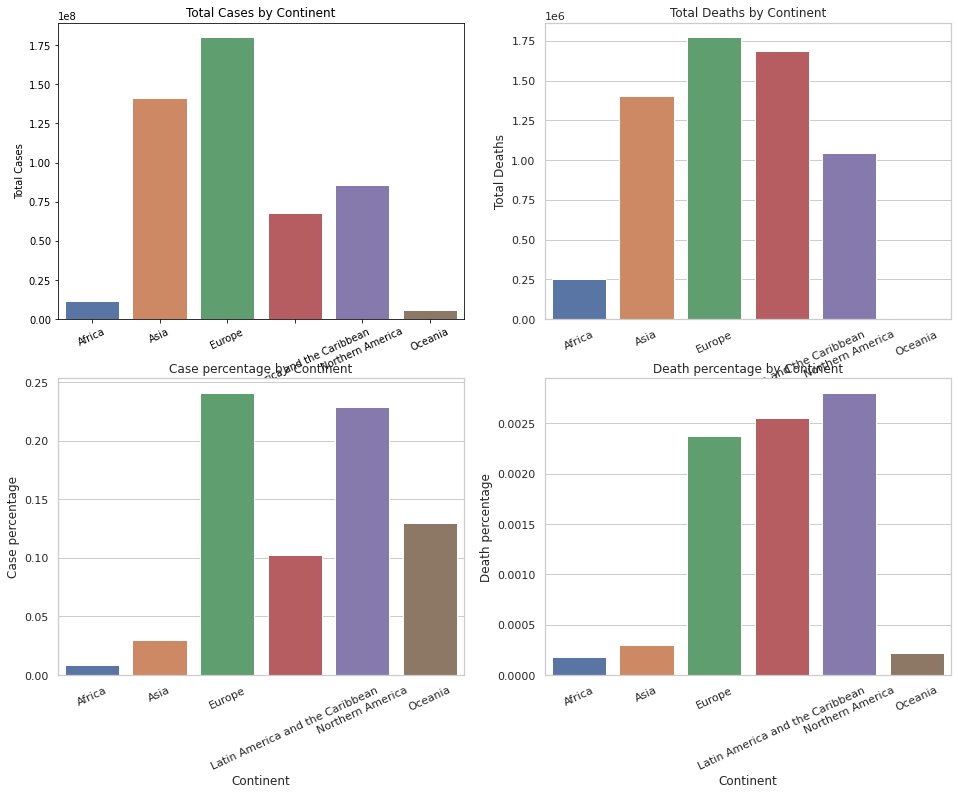

In [14]:
# Create a plot
plt.figure(figsize=(16,12))

plt.subplot(221)
plt.title("Total Cases by Continent")
sns.set_theme(style="whitegrid")
cont_TC = sns.barplot(x=group_continent.index, y="Total Cases", data=group_continent)
cont_TC.set_xticklabels(cont_TC.get_xticklabels(),rotation = 25)

plt.subplot(222)
plt.title("Total Deaths by Continent")
sns.set_theme(style="whitegrid")
cont_TC = sns.barplot(x=group_continent.index, y="Total Deaths", data=group_continent)
cont_TC.set_xticklabels(cont_TC.get_xticklabels(),rotation = 25)

plt.subplot(223)
plt.title("Case percentage by Continent")
sns.set_theme(style="whitegrid")
cont_TC = sns.barplot(x=group_continent.index, y="Case percentage", data=group_continent)
cont_TC.set_xticklabels(cont_TC.get_xticklabels(),rotation = 25)

plt.subplot(224)
plt.title("Death percentage by Continent")
sns.set_theme(style="whitegrid")
cont_TC = sns.barplot(x=group_continent.index, y="Death percentage", data=group_continent)
cont_TC.set_xticklabels(cont_TC.get_xticklabels(),rotation = 25)
# Check that a figure appears below
step_4.check()
plt.show()

## Keep going

Learn how to use your skills after completing the micro-course to create data visualizations in a **[final tutorial](https://www.kaggle.com/alexisbcook/creating-your-own-notebooks)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*